In [1]:
import pandas as pd

In [98]:
df = pd.read_csv('london_weather.csv')

In [111]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [100]:
df.corr(method='pearson')

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,1.000000,-0.107060,0.009067,0.008132,0.086843,0.094389,0.095322,0.008122,-0.013423,-0.043738
cloud_cover,-0.107060,1.000000,-0.738291,-0.485973,-0.212224,-0.110556,0.048838,0.235269,-0.241955,-0.001256
sunshine,0.009067,-0.738291,1.000000,0.852632,0.472182,0.396535,0.219082,-0.231636,0.226943,-0.034222
global_radiation,0.008132,-0.485973,0.852632,1.000000,0.690946,0.635432,0.478119,-0.162668,0.150078,-0.061781
max_temp,0.086843,-0.212224,0.472182,0.690946,1.000000,0.912200,0.810514,-0.071799,0.100455,-0.130594
mean_temp,0.094389,-0.110556,0.396535,0.635432,0.912200,1.000000,0.955593,-0.010462,0.004764,-0.154945
min_temp,0.095322,0.048838,0.219082,0.478119,0.810514,0.955593,1.000000,0.037233,-0.074274,-0.157882
precipitation,0.008122,0.235269,-0.231636,-0.162668,-0.071799,-0.010462,0.037233,1.000000,-0.349456,-0.001352
pressure,-0.013423,-0.241955,0.226943,0.150078,0.100455,0.004764,-0.074274,-0.349456,1.000000,-0.021229
snow_depth,-0.043738,-0.001256,-0.034222,-0.061781,-0.130594,-0.154945,-0.157882,-0.001352,-0.021229,1.000000


In [101]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [132]:
data = df[[
    'sunshine',
    'global_radiation',
    'max_temp']].copy().dropna(inplace=False).reset_index().drop('index', axis=1)

# X = data.copy().drop('max_temp', axis=1)
X = data['sunshine'].copy()
y = data['max_temp'].copy()

In [133]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

scaled_X = X_scaler.fit_transform(X.values.reshape(-1,1))
scaled_y = y_scaler.fit_transform(y.values.reshape(-1,1)).ravel()

In [134]:
pd.DataFrame(scaled_X)
# print(scaled_y.shape)

,0
0,0.43750
1,0.10625
2,0.00000
3,0.00000
4,0.12500
...,...
15311,0.05625
15312,0.23125
15313,0.00000
15314,0.02500


In [135]:
pd.DataFrame(scaled_y)

,0
0,0.192744
1,0.176871
2,0.170068
3,0.133787
4,0.267574
...,...
15311,0.310658
15312,0.222222
15313,0.233560
15314,0.267574


In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
x_pred = model.predict(X_train)

print(f'''
Model (score r^2)
Train\t: {model.score(X_train,y_train)}
Test\t: {model.score(X_test,y_test)}

Koefisien regresi (slope)\t: {model.coef_}
Intersepsi\t\t\t: {model.intercept_}
''')


Model (score r^2)
Train	: 0.22872868850094075
Test	: 0.1910175456041272

Koefisien regresi (slope)	: [0.28241416]
Intersepsi			: 0.4125457904375863



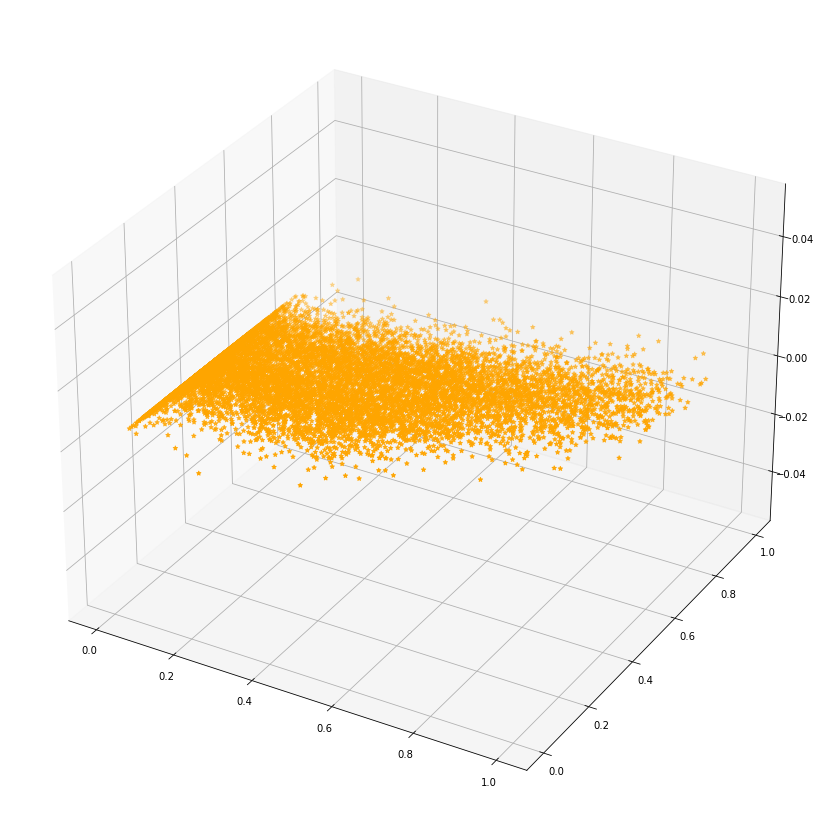

In [148]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0],y_train,c='orange',marker='*')


ValueError: X has 2 features, but LinearRegression is expecting 3 features as input.

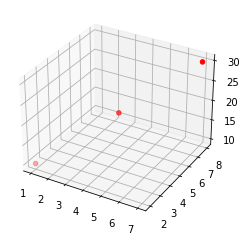

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data input
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])  # Variabel prediktor (3 data dengan 3 fitur)
Y = np.array([10, 20, 30])  # Variabel respons

# Membuat objek regresi linier
regression = LinearRegression()

# Melakukan fitting/regresi linier
regression.fit(X, Y)

# Membuat plot data observasi
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, c='r', marker='o')

# Membuat garis regresi
x1 = np.linspace(min(X[:, 0]), max(X[:, 0]), 10)
x2 = np.linspace(min(X[:, 1]), max(X[:, 1]), 10)
X1, X2 = np.meshgrid(x1, x2)
Y_pred = regression.predict(np.column_stack((X1.ravel(), X2.ravel())))
Y_pred = Y_pred.reshape(X1.shape)

# Menampilkan garis regresi
ax.plot_surface(X1, X2, Y_pred, alpha=0.5)

# Menambahkan label pada sumbu
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Menampilkan plot
plt.show()